## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#print
mouse_metadata
study_results

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice.
mouse_num = len(combined_df['Mouse ID'].unique())
print(f'Total Mice: {mouse_num}')

Total Mice: 249


In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_num_grouped = combined_df.groupby("Mouse ID")
mouse_num_grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [53]:
id_tp = mouse_num_grouped["Timepoint"].unique()
id_tp

Mouse ID
a203    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a251    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a262    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a275    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a366                [0, 5, 10, 15, 20, 25, 30]
                         ...                  
z435                                [0, 5, 10]
z578    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z581    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z795    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z969    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Name: Timepoint, Length: 249, dtype: object

In [54]:
tp_df = pd.DataFrame({"Timepoint": id_tp})
tp_df

,Timepoint
Mouse ID,
a203,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a251,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a262,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a275,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a366,"[0, 5, 10, 15, 20, 25, 30]"
...,...
z435,"[0, 5, 10]"
z578,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
z581,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 



In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tp_df = pd.DataFrame({"Timepoint": id_tp})
tp_df

,Timepoint
Mouse ID,
a203,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a251,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a262,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a275,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
a366,"[0, 5, 10, 15, 20, 25, 30]"
...,...
z435,"[0, 5, 10]"
z578,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
z581,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"


In [57]:
# Checking the number of mice in the clean DataFrame.
new_mouse_num = len(tp_df)
print(f'New Mice Number: {new_mouse_num}')

New Mice Number: 249


## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df = combined_df.groupby('Drug Regimen')
summary_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [59]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tum_mean = summary_df['Tumor Volume (mm3)'].mean()
tum_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [60]:
tum_med = summary_df['Tumor Volume (mm3)'].median()
tum_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [61]:
tum_var = summary_df['Tumor Volume (mm3)'].var()
tum_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [62]:
tum_std = summary_df['Tumor Volume (mm3)'].std()
tum_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [63]:
tum_sem = summary_df['Tumor Volume (mm3)'].sem()
tum_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [64]:
# Assemble the resulting series into a single summary dataframe.
tumor_df = pd.DataFrame({'Mean': tum_mean, 'Median': tum_med, 'Variance': tum_var, 'Standard Deviation': tum_std, 'Standard Error of Mean': tum_sem})
tumor_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Capomulin = pd.DataFrame(tumor_df.iloc[0])
Capomulin

,Capomulin
Mean,40.675741
Median,41.557809
Variance,24.947764
Standard Deviation,4.994774
Standard Error of Mean,0.329346


In [66]:
Cefatmin = pd.DataFrame(tumor_df.iloc[1])
Infubinol = pd.DataFrame(tumor_df.iloc[2])
Ketpril = pd.DataFrame(tumor_df.iloc[3])
Naftisol = pd.DataFrame(tumor_df.iloc[4])
Placebo = pd.DataFrame(tumor_df.iloc[5])
Propriva = pd.DataFrame(tumor_df.iloc[6])
Ramicane = pd.DataFrame(tumor_df.iloc[7])
Stelasyn = pd.DataFrame(tumor_df.iloc[8])
Zoniferol = pd.DataFrame(tumor_df.iloc[9])

In [67]:
Cefatmin

,Ceftamin
Mean,52.591172
Median,51.776157
Variance,39.290177
Standard Deviation,6.268188
Standard Error of Mean,0.469821


In [68]:
Infubinol

,Infubinol
Mean,52.884795
Median,51.820584
Variance,43.128684
Standard Deviation,6.567243
Standard Error of Mean,0.492236


In [69]:
Ketpril

,Ketapril
Mean,55.235638
Median,53.698743
Variance,68.553577
Standard Deviation,8.279709
Standard Error of Mean,0.603860


In [70]:
Naftisol

,Naftisol
Mean,54.331565
Median,52.509285
Variance,66.173479
Standard Deviation,8.134708
Standard Error of Mean,0.596466


In [71]:
Placebo

,Placebo
Mean,54.033581
Median,52.288934
Variance,61.168083
Standard Deviation,7.821003
Standard Error of Mean,0.581331


In [72]:
Propriva

,Propriva
Mean,52.322552
Median,50.854632
Variance,42.351070
Standard Deviation,6.507770
Standard Error of Mean,0.512884


In [73]:
Ramicane

,Ramicane
Mean,40.216745
Median,40.673236
Variance,23.486704
Standard Deviation,4.846308
Standard Error of Mean,0.320955


In [74]:
Stelasyn

,Stelasyn
Mean,54.233149
Median,52.431737
Variance,59.450562
Standard Deviation,7.710419
Standard Error of Mean,0.573111


In [75]:
Zoniferol

,Zoniferol
Mean,53.236507
Median,51.818479
Variance,48.533355
Standard Deviation,6.966589
Standard Error of Mean,0.516398


In [76]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = summary_df.agg(['mean', 'median', 'var','std','sem'])['Tumor Volume (mm3)']
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

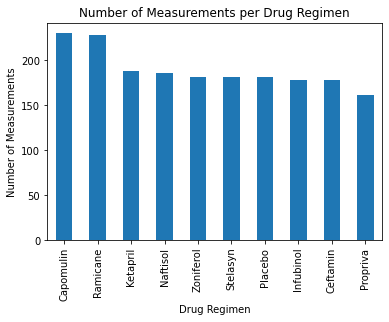

In [77]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pd_plot = combined_df['Drug Regimen'].value_counts().plot.bar()
pd_plot.set_title("Number of Measurements per Drug Regimen")
pd_plot.set_xlabel("Drug Regimen")
pd_plot.set_ylabel("Number of Measurements")

In [78]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
pd_plot2 = combined_df['Drug Regimen'].value_counts()
pd_plot2


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

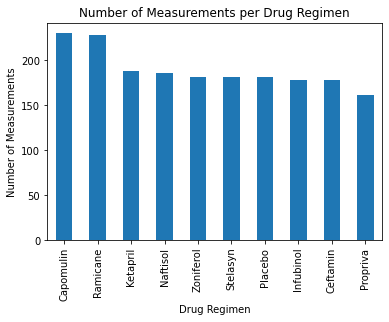

In [79]:
pd_plot2.plot(kind="bar", title="Number of Measurements per Drug Regimen",xlabel="Drug Regimen", ylabel="Number of Measurements")
plt.show()

Text(0, 0.5, '')

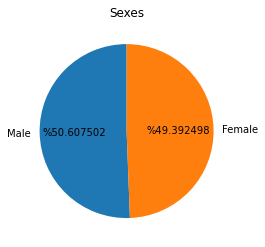

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot1 = combined_df['Sex'].value_counts().plot.pie(autopct = "%.%%f",startangle=90)
pie_plot1.set_title("Sexes")
pie_plot1.set_ylabel("")

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot2 = combined_df['Sex'].value_counts()
pie_plot2


Male      958
Female    935
Name: Sex, dtype: int64

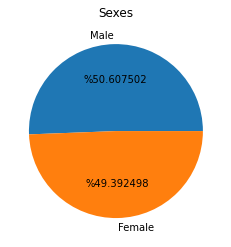

In [82]:
pie_plot2.plot(kind="pie", title="Sexes",xlabel="Drug Regimen",ylabel="", autopct = "%.%%f")
plt.show()

## Quartiles, Outliers and Boxplots

In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
drug_bin = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [136]:
last_tp = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max())


In [135]:
# Start by getting the last (greatest) timepoint for each mouse
last_tp = pd.DataFrame(combined_df.groupby('Mouse ID')['Timepoint'].max()).rename(columns={'Timepoint':'Max Timepoint'})


In [128]:
all_data = pd.merge(combined_df, last_tp, on='Mouse ID')


In [168]:
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #Create empty list to fill with tumor vol data (for plotting)
drug_data = []
for drugs in drug_bin:
    zoot = final_df.loc[final_df['Drug Regimen'] == drugs]
    zoot2 = zoot.loc[zoot['Timepoint'] == zoot['Max Timepoint']]
    Tvols = zoot2['Tumor Volume (mm3)']
    drug_data.append(Tvols)
    
    quartiles = Tvols.quantile([.25, .5, .75])
    lowq = quartiles[.25]
    upq = quartiles[.75]
    iqr = upq - lowq
    lowbound = lowq - (1.5*iqr)
    upbound = upq + (1.5*iqr)
    print(f'Drug Regimen: {drugs}')
    print(f'Lower Quartile = {lowq}')
    print(f'Upper Quartile = {upq}')
    print(f'The IQR for {drugs} is: {iqr}')
    print(f'Lower Bound = {lowbound}')
    print(f'Upper Bound = {upbound}')
    print(f'Values below {lowbound} could be outliers')
    print(f'Values below {upbound} could be outliers')

Drug Regimen: Capomulin
Lower Quartile = 32.37735684
Upper Quartile = 40.1592203
The IQR for Capomulin is: 7.781863460000004
Lower Bound = 20.70456164999999
Upper Bound = 51.83201549
Values below 20.70456164999999 could be outliers
Values below 51.83201549 could be outliers
Drug Regimen: Ramicane
Lower Quartile = 31.56046955
Upper Quartile = 40.65900627
The IQR for Ramicane is: 9.098536719999998
Lower Bound = 17.912664470000003
Upper Bound = 54.30681135
Values below 17.912664470000003 could be outliers
Values below 54.30681135 could be outliers
Drug Regimen: Infubinol
Lower Quartile = 54.04860769
Upper Quartile = 65.52574285
The IQR for Infubinol is: 11.477135160000003
Lower Bound = 36.83290494999999
Upper Bound = 82.74144559000001
Values below 36.83290494999999 could be outliers
Values below 82.74144559000001 could be outliers
Drug Regimen: Ceftamin
Lower Quartile = 48.72207785
Upper Quartile = 64.29983003
The IQR for Ceftamin is: 15.577752179999997
Lower Bound = 25.355449580000002
Up

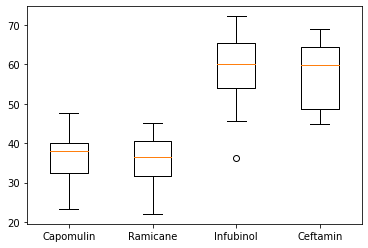

In [169]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_data)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
a275 = combined_df.loc[combined_df['Mouse ID'] == 'a275']

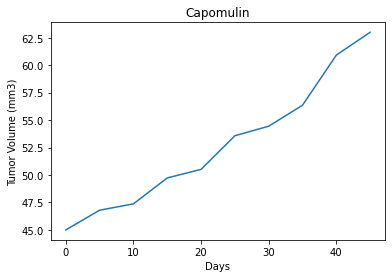

In [216]:
plt.plot(a275['Timepoint'], a275['Tumor Volume (mm3)'])
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin")
plt.show()

In [217]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']


In [218]:
capvol_avg = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})


In [219]:
capvol_df = pd.merge(cap_df, capvol_avg, on = 'Mouse ID')
capvol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Avg Tumor Volume (mm3)
0,s185,Capomulin,Female,3,17,0,45.000000,0,34.559143
1,s185,Capomulin,Female,3,17,5,43.878496,0,34.559143
2,s185,Capomulin,Female,3,17,10,37.614948,0,34.559143
3,s185,Capomulin,Female,3,17,15,38.177232,0,34.559143
4,s185,Capomulin,Female,3,17,20,36.866876,0,34.559143
...,...,...,...,...,...,...,...,...,...
225,i557,Capomulin,Female,1,24,45,47.685963,1,44.805810
226,r157,Capomulin,Male,22,25,0,45.000000,0,45.798970
227,r157,Capomulin,Male,22,25,5,45.597064,0,45.798970
228,r157,Capomulin,Male,22,25,10,46.059608,0,45.798970


In [220]:
lastcapvol = capvol_df[['Weight (g)', 'Avg Tumor Volume (mm3)']].drop_duplicates()


In [221]:
x_axis = lastcapvol['Weight (g)']
y_axis = lastcapvol['Avg Tumor Volume (mm3)']

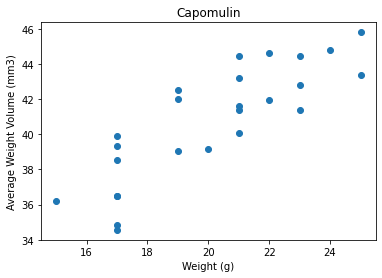

In [222]:
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Weight Volume (mm3)")
plt.title("Capomulin")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [223]:
cap_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capvol_avg = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).rename(columns={'Tumor Volume (mm3)':'Avg Tumor Volume (mm3)'})
capvol_df = pd.merge(cap_df, capvol_avg, on = 'Mouse ID')
lastcapvol = capvol_df[['Weight (g)', 'Avg Tumor Volume (mm3)']].drop_duplicates()
x_axis = lastcapvol['Weight (g)']
y_axis = lastcapvol['Avg Tumor Volume (mm3)']

In [226]:
corco = st.pearsonr(x_axis, y_axis)
corco

(0.8419363424694718, 1.3225722434712687e-07)

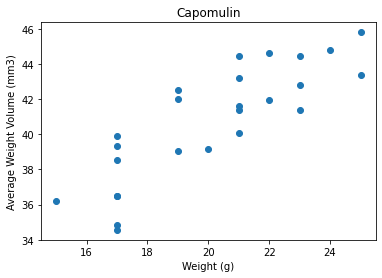

In [225]:
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Weight Volume (mm3)")
plt.title("Capomulin")
plt.show()